<a href="https://colab.research.google.com/github/MacielBarbero/Portfolio/blob/main/Crime_compartir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import plotly.graph_objs as go
# Varios
# ==============================================================================
from IPython.display import display as ds
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
import warnings
warnings.filterwarnings('ignore')
import multiprocessing
import random
from itertools import product
np.set_printoptions(suppress=True)
# Preprocesado y modelado
# ==============================================================================
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Fundamentos_CaC_2024/Trabajo_final/base_limpia.csv')

In [ ]:
print(df.columns)
df.shape

Index(['anio', 'mes', 'dia', 'fecha', 'franja_horaria', 'tipo', 'subtipo',
       'uso_arma', 'uso_moto', 'barrio', 'comuna', 'latitud', 'longitud'],
      dtype='object')


(497116, 13)

# Columnas variables Cuantitativas

In [ ]:
# Columnas variables Cuantitativas
# ==============================================================================
columns_numerical = df.select_dtypes(include=['float','int'],).columns
ds(columns_numerical)
len(columns_numerical)

Index(['anio', 'franja_horaria', 'comuna', 'latitud', 'longitud'], dtype='object')

5

# Columnas variables Cualitativas

In [ ]:
# Columnas categóricas
columns_categorical = df.select_dtypes(include=['object']).columns
ds(columns_categorical)
len(columns_categorical)

Index(['mes', 'dia', 'fecha', 'tipo', 'subtipo', 'uso_arma', 'uso_moto',
       'barrio'],
      dtype='object')

8

# Convertir algunas numéricas a categóricas.

In [ ]:
# Convertir las columnas a categórico.
df['anio'] = df['anio'].astype('category')
df['comuna'] = df['comuna'].astype('category')

columns_categorical = df.select_dtypes(include=['object', 'category']).columns
ds(columns_categorical)
len(columns_categorical)


Index(['anio', 'mes', 'dia', 'fecha', 'tipo', 'subtipo', 'uso_arma',
       'uso_moto', 'barrio', 'comuna'],
      dtype='object')

10

# Distribuciones variables cuantitativas.

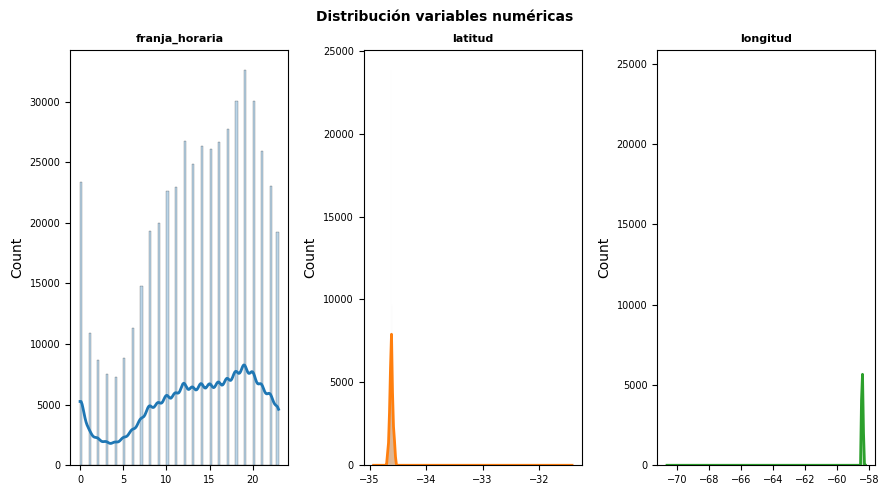

In [ ]:
# Gráficos de distribución para cada variable cuantitativa kde/histograma
# ==============================================================================
def graficosCuantitativos(columns_data):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
    axes = axes.flat
    for i, column in enumerate(columns_data):
        sns.histplot(
            data=df,
            x=column,
            stat='count',
            kde=True,
            color=(list(plt.rcParams['axes.prop_cycle'])*2)[i]['color'],  # administ
            line_kws={'linewidth': 2},  # espesor de linea
            alpha=0.3,  # transparencia
            ax=axes[i]
        )
        axes[i].set_title(column, fontweight="bold", fontsize=8)
        axes[i].tick_params(labelsize=7)
        axes[i].set_xlabel('')

    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    fig.suptitle('Distribución variables numéricas', fontweight="bold", fontsize=10)

# Llamada a la función
# graficosCuantitativos(columns_numerical[1:3])
graficosCuantitativos(df.select_dtypes(include='number'))


In [ ]:
print(df['franja_horaria'].describe())

print("\nLa moda es: ",df['franja_horaria'].mode())
print("\nLa mediana es: ",df['franja_horaria'].median())


count    497116.000000
mean         13.414097
std           6.387044
min           0.000000
25%           9.000000
50%          14.000000
75%          19.000000
max          23.000000
Name: franja_horaria, dtype: float64

La moda es:  0    19.0
Name: franja_horaria, dtype: float64

La mediana es:  14.0


# Distribución Variables cualitativas.

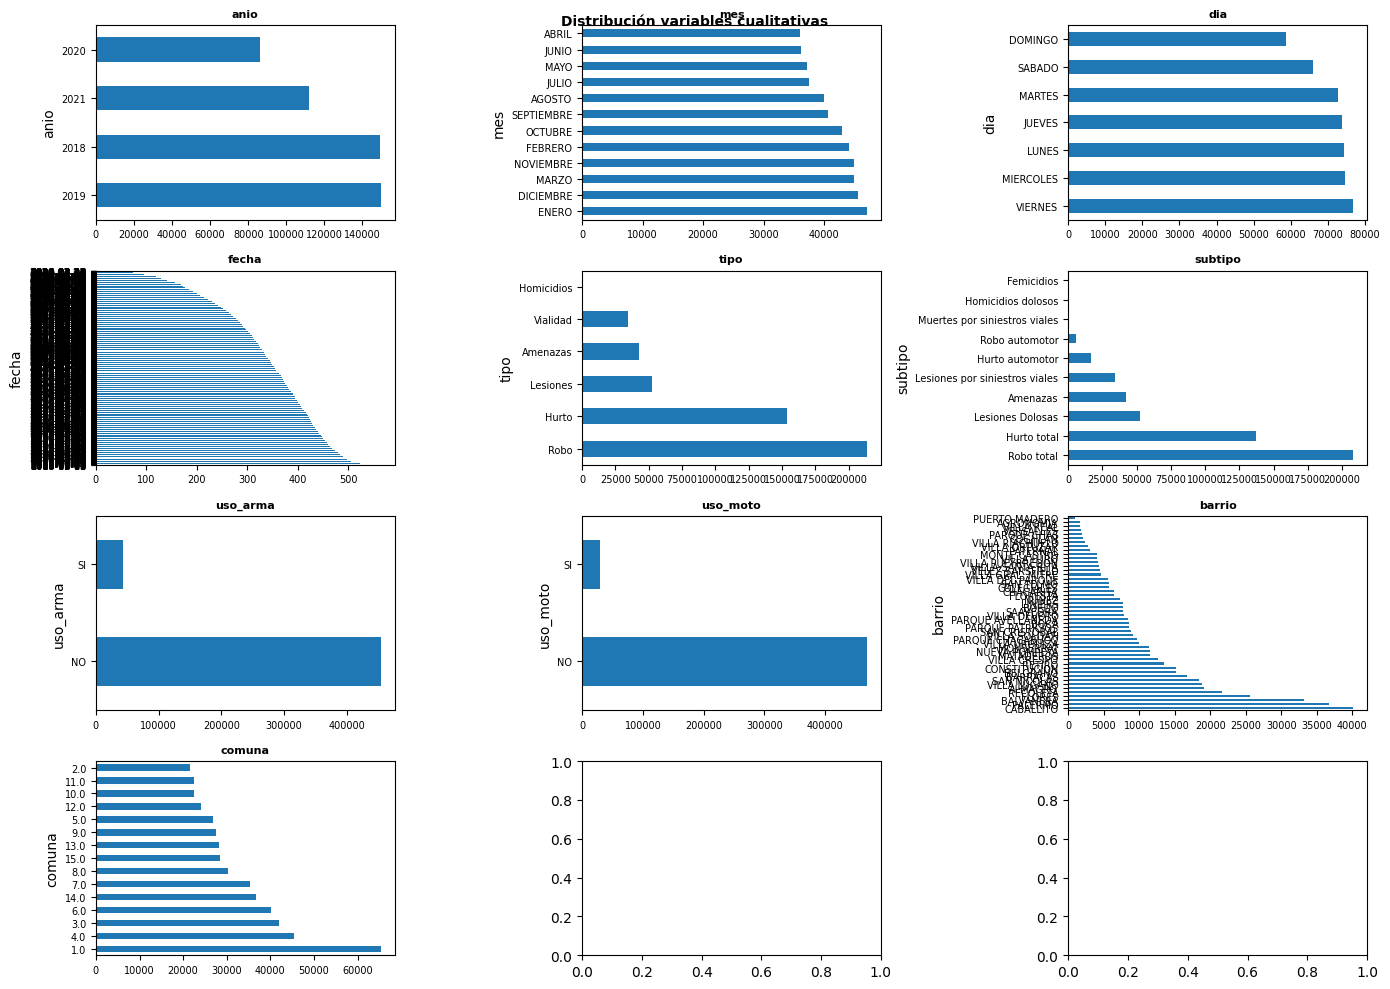

In [ ]:
# Gráficos de distribución para cada variable cualitativa
# ==============================================================================
def graficosCualitativos(num_rows, num_cols, columns_data, df):
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 10))
    axes = axes.flat
    for i, column in enumerate(columns_data):
        df[column].value_counts().plot.barh(ax=axes[i])
        axes[i].set_title(column, fontweight="bold", fontsize=8)
        axes[i].tick_params(labelsize=7)
        axes[i].set_xlabel('')

    fig.tight_layout()
    fig.suptitle('Distribución variables cualitativas\n', fontweight="bold", fontsize=10)

# Llamada a la función.

graficosCualitativos(4, 3, df.select_dtypes(include=['object', 'category']), df)

In [ ]:
df['tipo'].unique()

array(['Robo', 'Hurto', 'Vialidad', 'Homicidios', 'Amenazas', 'Lesiones'],
      dtype=object)

In [ ]:
df['subtipo'].unique()

array(['Robo total', 'Robo automotor', 'Hurto total', 'Hurto automotor',
       'Lesiones por siniestros viales', 'Femicidios',
       'Homicidios dolosos', 'Amenazas', 'Lesiones Dolosas',
       'Muertes por siniestros viales'], dtype=object)

In [ ]:
df.columns

Index(['anio', 'mes', 'dia', 'fecha', 'franja_horaria', 'tipo', 'subtipo',
       'uso_arma', 'uso_moto', 'barrio', 'comuna', 'latitud', 'longitud'],
      dtype='object')

# Posibles variables respuesta: tipo y subtipo

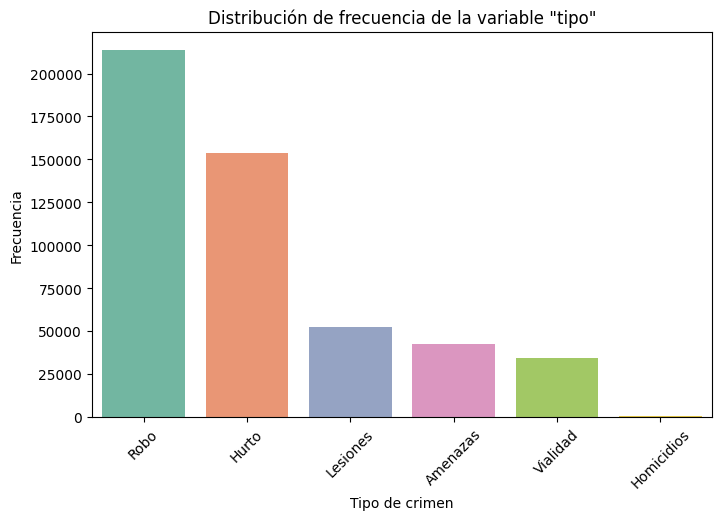

In [ ]:
# Calcular frecuencia de cada categoría
frecuencias = df['tipo'].value_counts()

# Gráfico de barras para distribución de frecuencia
plt.figure(figsize=(8, 5))
sns.countplot(x='tipo', data=df, palette='Set2', order=frecuencias.index)
plt.title('Distribución de frecuencia de la variable "tipo"')
plt.xlabel('Tipo de crimen')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# Calcular porcentajes de frecuencia
porcentajes = df['tipo'].value_counts(normalize=True) * 100

# Crear tabla de frecuencias y porcentajes
tabla_frecuencia = pd.DataFrame({'Frecuencia': frecuencias, 'Porcentaje (%)': porcentajes})
tabla_frecuencia.index.name = 'Tipo de crimen'

print("Tabla de Frecuencia y Porcentaje:")
print(tabla_frecuencia)


Tabla de Frecuencia y Porcentaje:
                Frecuencia  Porcentaje (%)
Tipo de crimen                            
Robo                213516       42.950941
Hurto               153989       30.976472
Lesiones             52385       10.537782
Amenazas             42479        8.545088
Vialidad             34275        6.894769
Homicidios             472        0.094948


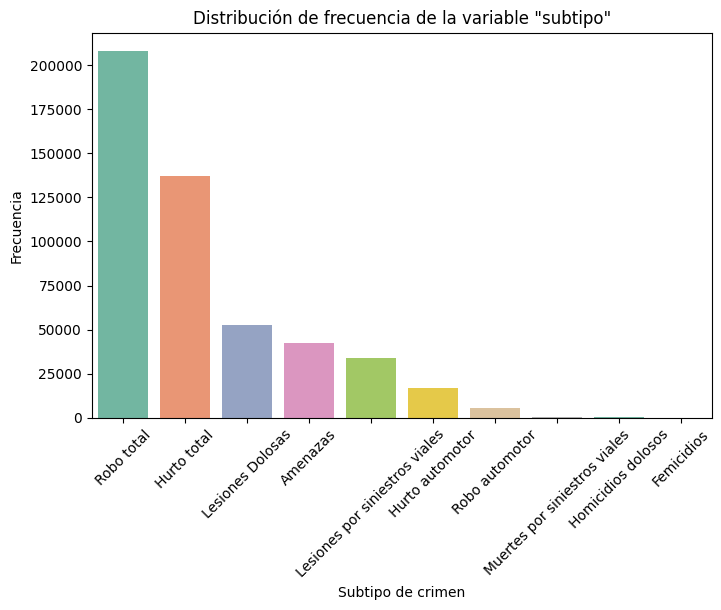

In [ ]:
# Calcular frecuencia de cada categoría
frecuencias = df['subtipo'].value_counts()

# Gráfico de barras para distribución de frecuencia
plt.figure(figsize=(8, 5))
sns.countplot(x='subtipo', data=df, palette='Set2', order=frecuencias.index)
plt.title('Distribución de frecuencia de la variable "subtipo"')
plt.xlabel('Subtipo de crimen')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calcular porcentajes de frecuencia
porcentajes = df['subtipo'].value_counts(normalize=True) * 100

# Crear tabla de frecuencias y porcentajes
tabla_frecuencia = pd.DataFrame({'Frecuencia': frecuencias, 'Porcentaje (%)': porcentajes})
tabla_frecuencia.index.name = 'Subtipo de crimen'

print("Tabla de Frecuencia y Porcentaje:")
print(tabla_frecuencia)


Tabla de Frecuencia y Porcentaje:
                                Frecuencia  Porcentaje (%)
Subtipo de crimen                                         
Robo total                          207905       41.822231
Hurto total                         137029       27.564794
Lesiones Dolosas                     52385       10.537782
Amenazas                             42479        8.545088
Lesiones por siniestros viales       33845        6.808270
Hurto automotor                      16960        3.411679
Robo automotor                        5611        1.128710
Muertes por siniestros viales          430        0.086499
Homicidios dolosos                     427        0.085895
Femicidios                              45        0.009052


# Valores únicos por variable

In [ ]:
variables = list(df.columns)

for i in variables:
    print("\n",i)
    print(df[i].unique())



 anio
[2018, 2019, 2020, 2021]
Categories (4, int64): [2018, 2019, 2020, 2021]

 mes
['AGOSTO' 'MAYO' 'OCTUBRE' 'JULIO' 'ABRIL' 'MARZO' 'SEPTIEMBRE' 'JUNIO'
 'NOVIEMBRE' 'ENERO' 'FEBRERO' 'DICIEMBRE']

 dia
['DOMINGO' 'LUNES' 'MIERCOLES' 'VIERNES' 'JUEVES' 'SABADO' 'MARTES']

 fecha
['2018-08-05' '2018-08-06' '2018-08-08' ... '2021-08-15' '2021-08-08'
 '2021-08-20']

 franja_horaria
[16. 17. 22. 15. 12. 14. 18.  4. 21. 20. 13.  7.  9.  6.  5.  2. 19. 23.
  3. 11.  8. 10.  0.  1.]

 tipo
['Robo' 'Hurto' 'Vialidad' 'Homicidios' 'Amenazas' 'Lesiones']

 subtipo
['Robo total' 'Robo automotor' 'Hurto total' 'Hurto automotor'
 'Lesiones por siniestros viales' 'Femicidios' 'Homicidios dolosos'
 'Amenazas' 'Lesiones Dolosas' 'Muertes por siniestros viales']

 uso_arma
['NO' 'SI']

 uso_moto
['NO' 'SI']

 barrio
['RETIRO' 'SAN NICOLAS' 'BALVANERA' 'MONSERRAT' 'SAN CRISTOBAL'
 'CONSTITUCION' 'SAN TELMO' 'RECOLETA' 'NUEVA POMPEYA' 'PARQUE PATRICIOS'
 'BARRACAS' 'BOCA' 'ALMAGRO' 'BOEDO' 'CABALLIT

# Correlaciones

In [ ]:
df_correlaciones = df.copy()

In [ ]:
# Elimino los valores donde comuna y barrio son faltantes, porque sé que latitud y longitud se imputaron de manera incorrecta y son solo 58 observaciones.
df_correlaciones = df_correlaciones.dropna(subset=['comuna', 'barrio'])
df_correlaciones.shape

(497058, 13)

In [ ]:
# Reemplazo 'uso_arma' y 'uso_moto' por 1 cuando es SI y 0 cuando es NO.

# df_correlaciones['uso_arma'] = df_correlaciones['uso_arma'].apply(lambda x: 0 if x == 'NO' else 1)

# Cuidado con el "else" porque si aplico dos veces el código seguido me reemplaza todo por uno.

# df_correlaciones['uso_moto'] = df_correlaciones['uso_moto'].apply(lambda x: 0 if x == 'NO' else 1)

df_correlaciones['uso_moto'].unique()
df_correlaciones['uso_moto'].value_counts()

# df_correlaciones['uso_arma'].unique()
# df_correlaciones['uso_arma'].value_counts()

uso_moto
0    468043
1     29015
Name: count, dtype: int64

In [ ]:
# import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

# Vamos a asumir que 'subtipo' es la variable respuesta y 'mes', 'dia', 'franja_horaria', 'uso_arma', 'uso_moto', 'comuna' son las variables explicativas


# Codificar variables categóricas para visualización si es necesario
label_encoder = LabelEncoder()
df_correlaciones['mes_encoded'] = label_encoder.fit_transform(df_correlaciones['mes'])
df_correlaciones['subtipo_encoded'] = label_encoder.fit_transform(df_correlaciones['subtipo'])
df_correlaciones['dia_encoded'] = label_encoder.fit_transform(df_correlaciones['dia'])
df_correlaciones['tipo_encoded'] = label_encoder.fit_transform(df_correlaciones['tipo'])




### Correlación con "subtipo"



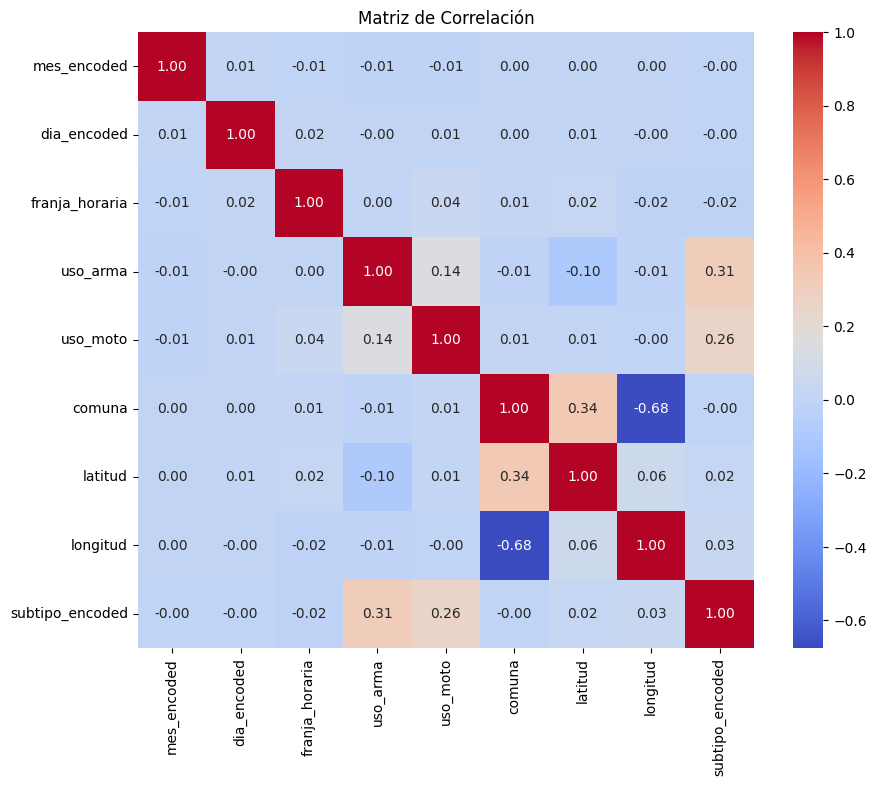

In [ ]:
# Crear un DataFrame con las variables de interés
df_subset = df_correlaciones[['mes_encoded', 'dia_encoded', 'franja_horaria', 'uso_arma', 'uso_moto', 'comuna', 'latitud', 'longitud', 'subtipo_encoded']]

# Calcular la matriz de correlación
correlation_matrix = df_subset.corr()

# Visualizar la matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()

### Correlación con "tipo"

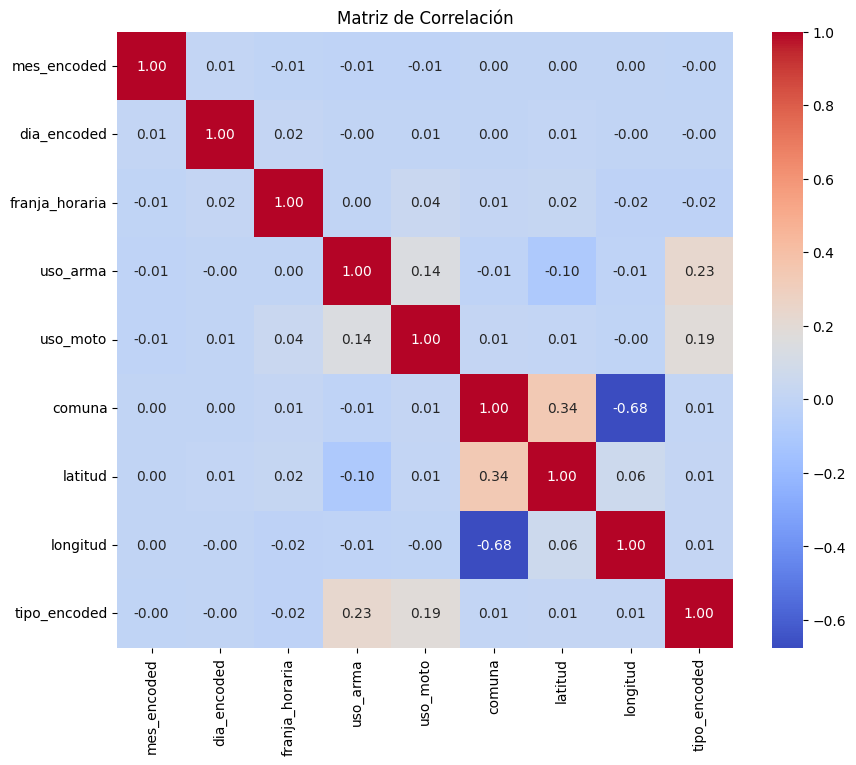

In [ ]:
# Crear un DataFrame con las variables de interés
df_subset = df_correlaciones[['mes_encoded', 'dia_encoded', 'franja_horaria', 'uso_arma', 'uso_moto', 'comuna', 'latitud', 'longitud', 'tipo_encoded']]

# Calcular la matriz de correlación
correlation_matrix = df_subset.corr()

# Visualizar la matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación')
plt.show()

## Máquinas de Vectores de Soporte (SVM)

## SVM Versión 1

In [ ]:
df_1 = df.copy()  # Copia del DataFrame original

# Defino las variables objetivo y las variables explicativas
y = df_1['subtipo']  # Variable respuesta: subtipo de delito
X = df_1.drop(columns=['subtipo', 'tipo'])  # Variables explicativas: todas las columnas excepto 'subtipo' y 'tipo'.



## Preprocesamiento de datos y construcción del pipeline
Para manejar las variables categóricas y numéricas de manera apropiada, construiremos un pipeline que incluya:

* Imputación de valores faltantes.
* Codificación one-hot para variables categóricas.
* Escalado de características numéricas.
* Entrenamiento de un modelo SVM.



In [ ]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['anio', 'mes', 'dia', 'franja_horaria', 'uso_arma', 'uso_moto', 'barrio', 'comuna']
numeric_cols = ['latitud', 'longitud']

# Pipeline para preprocesamiento y modelo SVM
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())  # Escalar características numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación one-hot para variables categóricas
])

# Combinar transformadores
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Pipeline completo con preprocesamiento y SVM
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])


## División de datos y ajuste del modelo

In [ ]:
# Tomar una muestra aleatoria más pequeña del 5% de los datos originales
_, X_sample, _, y_sample = train_test_split(X, y, test_size=0.05, random_state=42)

# Dividir la muestra en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Usar el pipeline definido previamente CON preprocesamiento (from ipython-input-90)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])

# Definir parámetros para GridSearchCV con menos combinaciones
param_grid = {
    'classifier__kernel': ['linear'],
    'classifier__C': [1],
    'classifier__gamma': ['scale']
}

# Utilizar StratifiedKFold para la validación cruzada
cv_strat = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Instanciar GridSearchCV con optimizaciones
grid_search = GridSearchCV(pipeline, param_grid, cv=cv_strat, verbose=2, n_jobs=-1)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor score de validación cruzada:")
print(grid_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")



Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores parámetros encontrados:
{'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Mejor score de validación cruzada:
0.4384429692214846
Precisión en el conjunto de prueba: 0.43


## SMV versión 2

In [ ]:
df_1 = df.copy()  # Hacer una copia del DataFrame original

# Trato a latitud y longitud como una sola variable.
df_1['punto_geografico'] = list(zip(df_1['latitud'], df_1['longitud']))

# Definir las variables objetivo y las variables explicativas
y = df_1['subtipo']  # Variable respuesta: subtipo de delito
X = df_1[['mes', 'dia', 'franja_horaria', 'uso_arma', 'uso_moto', 'comuna', 'punto_geografico']]  # Variables explicativas

In [ ]:
df_1['punto_geografico'].unique()
df_1['punto_geografico'].value_counts()

punto_geografico
(-34.61349642758522, -58.43543946800099)    19180
(-34.654819, -58.398481)                     1332
(-34.674789, -58.466394)                     1086
(-34.582191, -58.380853)                     1064
(-34.649197, -58.440418)                      722
                                            ...  
(-34.593164, -58.49312)                         1
(-34.597176, -58.492805)                        1
(-34.596694, -58.497221)                        1
(-34.595453, -58.495972)                        1
(-34.6196757307332, -58.472919413493)           1
Name: count, Length: 190106, dtype: int64

### Preprocesamiento de datos y construcción del pipeline

In [ ]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['mes', 'dia', 'franja_horaria','uso_arma', 'uso_moto', 'comuna', 'punto_geografico'] # Al cocatenar 'punto_geografico' no es más numérica.
# numeric_cols = []

# Pipeline para preprocesamiento y modelo SVM
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())  # Escalar características numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación one-hot para variables categóricas
])

# Combinar transformadores
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Pipeline completo con preprocesamiento y SVM
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])


### División de datos y ajuste del modelo

In [ ]:
# Tomar una muestra aleatoria más pequeña del 5% de los datos originales
_, X_sample, _, y_sample = train_test_split(X, y, test_size=0.05, random_state=42)

# Dividir la muestra en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Usar el pipeline definido previamente CON preprocesamiento (from ipython-input-90)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])

# Definir parámetros para GridSearchCV con menos combinaciones
param_grid = {
    'classifier__kernel': ['linear'],
    'classifier__C': [1],
    'classifier__gamma': ['scale']
}

# Utilizar StratifiedKFold para la validación cruzada
cv_strat = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Instanciar GridSearchCV con optimizaciones
grid_search = GridSearchCV(pipeline, param_grid, cv=cv_strat, verbose=2, n_jobs=-1)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor score de validación cruzada:")
print(grid_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores parámetros encontrados:
{'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Mejor score de validación cruzada:
0.4275296720981694
Precisión en el conjunto de prueba: 0.43


## SMV versión 3

In [ ]:
df_1 = df.copy()  # Hacer una copia del DataFrame original

# Definir las variables objetivo y las variables explicativas
y = df_1['subtipo']  # Variable respuesta: subtipo de delito
X = df_1[['dia', 'franja_horaria', 'uso_arma', 'uso_moto', 'comuna']]  # Variables explicativas

### Preprocesamiento de datos y construcción del pipeline

In [ ]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['dia', 'uso_arma', 'uso_moto', 'comuna']
numeric_cols = ['franja_horaria']

# Pipeline para preprocesamiento y modelo SVM
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())  # Escalar características numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación one-hot para variables categóricas
])

# Combinar transformadores
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Pipeline completo con preprocesamiento y SVM
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])


### División de datos y ajuste del modelo

In [ ]:
# Tomar una muestra aleatoria más pequeña del 5% de los datos originales
_, X_sample, _, y_sample = train_test_split(X, y, test_size=0.05, random_state=42)

# Dividir la muestra en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Usar el pipeline definido previamente CON preprocesamiento (from ipython-input-90)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])

# Definir parámetros para GridSearchCV con menos combinaciones
param_grid = {
    'classifier__kernel': ['linear'],
    'classifier__C': [1],
    'classifier__gamma': ['scale']
}

# Utilizar StratifiedKFold para la validación cruzada
cv_strat = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Instanciar GridSearchCV con optimizaciones
grid_search = GridSearchCV(pipeline, param_grid, cv=cv_strat, verbose=2, n_jobs=-1)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor score de validación cruzada:")
print(grid_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores parámetros encontrados:
{'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Mejor score de validación cruzada:
0.4275296720981694
Precisión en el conjunto de prueba: 0.43


### SMV versión 4

In [ ]:
df_1 = df.copy()  # Hacer una copia del DataFrame original

# Definir las variables objetivo y las variables explicativas
y = df_1['subtipo']  # Variable respuesta: subtipo de delito
X = df_1[['franja_horaria','uso_moto', 'comuna']]  # Variables explicativas

### Preprocesamiento de datos y construcción del pipeline

In [ ]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['uso_moto', 'comuna']
numeric_cols = ['franja_horaria']

# Pipeline para preprocesamiento y modelo SVM
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores faltantes con la media
    ('scaler', StandardScaler())  # Escalar características numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar valores faltantes con la moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación one-hot para variables categóricas
])

# Combinar transformadores
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Pipeline completo con preprocesamiento y SVM
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])


### División de datos y ajuste del modelo

In [ ]:
# Tomar una muestra aleatoria más pequeña del 5% de los datos originales
_, X_sample, _, y_sample = train_test_split(X, y, test_size=0.05, random_state=42)

# Dividir la muestra en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Usar el pipeline definido previamente CON preprocesamiento (from ipython-input-90)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC())])

# Definir parámetros para GridSearchCV con menos combinaciones
param_grid = {
    'classifier__kernel': ['linear'],
    'classifier__C': [1],
    'classifier__gamma': ['scale']
}

# Utilizar StratifiedKFold para la validación cruzada
cv_strat = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Instanciar GridSearchCV con optimizaciones
grid_search = GridSearchCV(pipeline, param_grid, cv=cv_strat, verbose=2, n_jobs=-1)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor score de validación cruzada:")
print(grid_search.best_score_)

# Evaluar el modelo en el conjunto de prueba
accuracy = grid_search.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mejores parámetros encontrados:
{'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
Mejor score de validación cruzada:
0.426121504727419
Precisión en el conjunto de prueba: 0.42
